<a href="https://colab.research.google.com/github/Ashutosh-Gairola/NLP/blob/main/LAB_4(18_09_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text classification using tf-idf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = [
      {'text': 'This is a positive example', 'label': 'positive'},
          {'text': 'Negative sentiment here', 'label': 'negative'},
              {'text': 'Another positive text', 'label': 'positive'},
                  {'text': 'Feeling negative today', 'label': 'negative'},
                      {'text': 'I feel great', 'label': 'positive'},
                          {'text': 'Not a good day', 'label': 'negative'}
                        ]

In [3]:
texts = [entry['text'] for entry in data]
labels = [entry['label'] for entry in data]

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [4]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [5]:
predictions = classifier.predict(X_test_tfidf)

In [6]:
accuracy = accuracy_score(y_test, predictions)

classification_rep = classification_report(y_test, predictions)

In [7]:
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report: ")

print(classification_rep)

Accuracy: 1.00
Classification Report: 
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



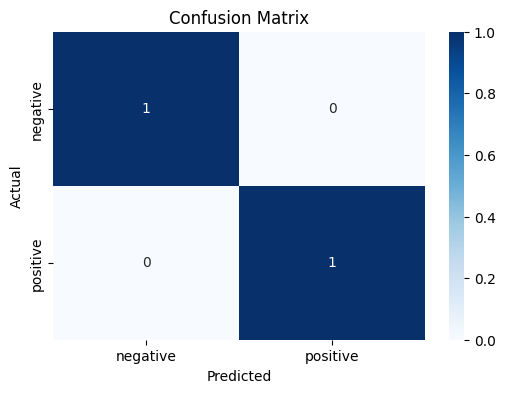

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()